# Analysing Google Merchandise Store Website Performance

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# Data Preprocessing and Cleaning

In [2]:
data = pd.read_csv('ga_data.csv')

In [3]:
data.head()

,Unnamed: 0,event_date,event_timestamp,event_name,event_params,event_previous_timestamp,event_value_in_usd,event_bundle_sequence_id,event_server_timestamp_offset,user_id,...,user_ltv,device,geo,app_info,traffic_source,stream_id,platform,event_dimensions,ecommerce,items
0,0,20201101,1604192073036492,page_view,"[{'key': 'page_title', 'value': {'string_value...",NaN,NaN,2351439526,NaN,NaN,...,"{'revenue': 0.0, 'currency': 'USD'}","{'category': 'desktop', 'mobile_brand_name': '...","{'continent': 'Asia', 'sub_continent': 'Southe...",NaN,"{'medium': 'organic', 'name': '(organic)', 'so...",2100450278,WEB,NaN,"{'total_item_quantity': None, 'purchase_revenu...",[]
1,1,20201101,1604192073036492,first_visit,"[{'key': 'session_engaged', 'value': {'string_...",NaN,NaN,2351439526,NaN,NaN,...,"{'revenue': 0.0, 'currency': 'USD'}","{'category': 'desktop', 'mobile_brand_name': '...","{'continent': 'Asia', 'sub_continent': 'Southe...",NaN,"{'medium': 'organic', 'name': '(organic)', 'so...",2100450278,WEB,NaN,"{'total_item_quantity': None, 'purchase_revenu...",[]
2,2,20201101,1604192082302672,user_engagement,"[{'key': 'dclid', 'value': {'string_value': No...",NaN,NaN,-4853805495,NaN,NaN,...,"{'revenue': 0.0, 'currency': 'USD'}","{'category': 'desktop', 'mobile_brand_name': '...","{'continent': 'Asia', 'sub_continent': 'Southe...",NaN,"{'medium': 'organic', 'name': '(organic)', 'so...",2100450278,WEB,NaN,"{'total_item_quantity': None, 'purchase_revenu...",[]
3,3,20201101,1604192073036492,session_start,"[{'key': 'page_location', 'value': {'string_va...",NaN,NaN,2351439526,NaN,NaN,...,"{'revenue': 0.0, 'currency': 'USD'}","{'category': 'desktop', 'mobile_brand_name': '...","{'continent': 'Asia', 'sub_continent': 'Southe...",NaN,"{'medium': 'organic', 'name': '(organic)', 'so...",2100450278,WEB,NaN,"{'total_item_quantity': None, 'purchase_revenu...",[]
4,4,20201101,1604202750089608,user_engagement,"[{'key': 'all_data', 'value': {'string_value':...",NaN,NaN,7473184003,NaN,NaN,...,"{'revenue': 0.0, 'currency': 'USD'}","{'category': 'mobile', 'mobile_brand_name': 'S...","{'continent': 'Americas', 'sub_continent': 'No...",NaN,"{'medium': '(none)', 'name': '(direct)', 'sour...",2100450278,WEB,NaN,"{'total_item_quantity': None, 'purchase_revenu...",[]


## Removing Columns

In [4]:
# remove duplicate index column
data.drop(['Unnamed: 0'], axis=1,inplace=True)

In [7]:
data.head()

,event_date,event_timestamp,event_name,event_params,event_previous_timestamp,event_value_in_usd,event_bundle_sequence_id,event_server_timestamp_offset,user_id,user_pseudo_id,...,user_ltv,device,geo,app_info,traffic_source,stream_id,platform,event_dimensions,ecommerce,items
0,20201101,1604192073036492,page_view,"[{'key': 'page_title', 'value': {'string_value...",NaN,NaN,2351439526,NaN,NaN,1.005695e+06,...,"{'revenue': 0.0, 'currency': 'USD'}","{'category': 'desktop', 'mobile_brand_name': '...","{'continent': 'Asia', 'sub_continent': 'Southe...",NaN,"{'medium': 'organic', 'name': '(organic)', 'so...",2100450278,WEB,NaN,"{'total_item_quantity': None, 'purchase_revenu...",[]
1,20201101,1604192073036492,first_visit,"[{'key': 'session_engaged', 'value': {'string_...",NaN,NaN,2351439526,NaN,NaN,1.005695e+06,...,"{'revenue': 0.0, 'currency': 'USD'}","{'category': 'desktop', 'mobile_brand_name': '...","{'continent': 'Asia', 'sub_continent': 'Southe...",NaN,"{'medium': 'organic', 'name': '(organic)', 'so...",2100450278,WEB,NaN,"{'total_item_quantity': None, 'purchase_revenu...",[]
2,20201101,1604192082302672,user_engagement,"[{'key': 'dclid', 'value': {'string_value': No...",NaN,NaN,-4853805495,NaN,NaN,1.005695e+06,...,"{'revenue': 0.0, 'currency': 'USD'}","{'category': 'desktop', 'mobile_brand_name': '...","{'continent': 'Asia', 'sub_continent': 'Southe...",NaN,"{'medium': 'organic', 'name': '(organic)', 'so...",2100450278,WEB,NaN,"{'total_item_quantity': None, 'purchase_revenu...",[]
3,20201101,1604192073036492,session_start,"[{'key': 'page_location', 'value': {'string_va...",NaN,NaN,2351439526,NaN,NaN,1.005695e+06,...,"{'revenue': 0.0, 'currency': 'USD'}","{'category': 'desktop', 'mobile_brand_name': '...","{'continent': 'Asia', 'sub_continent': 'Southe...",NaN,"{'medium': 'organic', 'name': '(organic)', 'so...",2100450278,WEB,NaN,"{'total_item_quantity': None, 'purchase_revenu...",[]
4,20201101,1604202750089608,user_engagement,"[{'key': 'all_data', 'value': {'string_value':...",NaN,NaN,7473184003,NaN,NaN,1.013443e+06,...,"{'revenue': 0.0, 'currency': 'USD'}","{'category': 'mobile', 'mobile_brand_name': 'S...","{'continent': 'Americas', 'sub_continent': 'No...",NaN,"{'medium': '(none)', 'name': '(direct)', 'sour...",2100450278,WEB,NaN,"{'total_item_quantity': None, 'purchase_revenu...",[]


In [8]:
data.columns

Index(['event_date', 'event_timestamp', 'event_name', 'event_params',
       'event_previous_timestamp', 'event_value_in_usd',
       'event_bundle_sequence_id', 'event_server_timestamp_offset', 'user_id',
       'user_pseudo_id', 'privacy_info', 'user_properties',
       'user_first_touch_timestamp', 'user_ltv', 'device', 'geo', 'app_info',
       'traffic_source', 'stream_id', 'platform', 'event_dimensions',
       'ecommerce', 'items'],
      dtype='object')

In [9]:
data['event_previous_timestamp'].unique()

array([nan])

In [10]:
data['event_value_in_usd'].unique()

array([     nan, 2.50e+01, 1.30e+01, 5.50e+01, 5.90e+01, 3.20e+01,
       1.20e+02, 7.20e+01, 3.40e+01, 6.00e+01, 8.70e+01, 4.60e+01,
       4.80e+01, 6.30e+01, 3.80e+01, 1.00e+01, 4.20e+01, 2.40e+01,
       1.92e+02, 5.60e+01, 1.03e+02, 3.50e+01, 2.80e+01, 5.80e+01,
       5.00e+01, 6.50e+01, 8.30e+01, 1.75e+02, 1.33e+02, 1.91e+02,
       9.30e+01, 2.12e+02, 1.51e+02, 8.60e+01, 1.37e+02, 2.00e+01,
       8.50e+01, 4.90e+01, 6.70e+01, 1.70e+02, 6.60e+01, 5.10e+01,
       1.40e+02, 1.27e+02, 9.98e+02, 9.00e+01, 1.62e+02, 1.64e+02,
       1.10e+01, 3.00e+01, 1.20e+01, 3.70e+01, 1.30e+02, 2.20e+01,
       1.11e+02, 1.70e+01, 2.70e+01, 5.40e+01, 7.40e+01, 8.80e+01,
       4.40e+01, 4.00e+01, 5.20e+01, 1.41e+02, 6.80e+01, 8.10e+01,
       3.60e+01, 2.19e+02, 1.16e+02, 2.79e+02, 1.83e+02, 4.70e+01,
       6.90e+01, 1.80e+01, 1.60e+01, 9.60e+01, 2.30e+01, 8.40e+01,
       3.30e+01, 8.00e+00, 1.10e+02, 1.06e+02, 1.28e+02, 9.70e+01,
       4.00e+00, 9.20e+01, 1.40e+01, 7.00e+01, 5.30e+01, 7.10e

In [11]:
data.isnull().sum() # number of null values in each column

event_date                             0
event_timestamp                        0
event_name                             0
event_params                           0
event_previous_timestamp         4295584
event_value_in_usd               4290342
event_bundle_sequence_id               0
event_server_timestamp_offset    4295584
user_id                          4295584
user_pseudo_id                         0
privacy_info                           0
user_properties                        0
user_first_touch_timestamp         86048
user_ltv                               0
device                                 0
geo                                    0
app_info                         4295584
traffic_source                         0
stream_id                              0
platform                               0
event_dimensions                 4295584
ecommerce                              0
items                                  0
dtype: int64

In [12]:
data.shape

(4295584, 23)

This shows that columns event_dimensions,app_info,user_id,event_server_timestamp_offset, event_previous_timestamp,event_value_in_usd are all empty, hence they need to be droppped.Similarly event_value_in_usd is almost empty, the values available are not enough to provide sound results, hence that column needs to be dropped

In [13]:
data.drop(['event_dimensions', 'app_info', 'user_id', 'event_server_timestamp_offset', 'event_previous_timestamp',
          'event_value_in_usd'], axis=1, inplace=True)
data.columns

Index(['event_date', 'event_timestamp', 'event_name', 'event_params',
       'event_bundle_sequence_id', 'user_pseudo_id', 'privacy_info',
       'user_properties', 'user_first_touch_timestamp', 'user_ltv', 'device',
       'geo', 'traffic_source', 'stream_id', 'platform', 'ecommerce', 'items'],
      dtype='object')

As visible, the selected columns are dropped

In [14]:
data.head(5)

,event_date,event_timestamp,event_name,event_params,event_bundle_sequence_id,user_pseudo_id,privacy_info,user_properties,user_first_touch_timestamp,user_ltv,device,geo,traffic_source,stream_id,platform,ecommerce,items
0,20201101,1604192073036492,page_view,"[{'key': 'page_title', 'value': {'string_value...",2351439526,1.005695e+06,"{'analytics_storage': None, 'ads_storage': Non...",[],1.604192e+15,"{'revenue': 0.0, 'currency': 'USD'}","{'category': 'desktop', 'mobile_brand_name': '...","{'continent': 'Asia', 'sub_continent': 'Southe...","{'medium': 'organic', 'name': '(organic)', 'so...",2100450278,WEB,"{'total_item_quantity': None, 'purchase_revenu...",[]
1,20201101,1604192073036492,first_visit,"[{'key': 'session_engaged', 'value': {'string_...",2351439526,1.005695e+06,"{'analytics_storage': None, 'ads_storage': Non...",[],1.604192e+15,"{'revenue': 0.0, 'currency': 'USD'}","{'category': 'desktop', 'mobile_brand_name': '...","{'continent': 'Asia', 'sub_continent': 'Southe...","{'medium': 'organic', 'name': '(organic)', 'so...",2100450278,WEB,"{'total_item_quantity': None, 'purchase_revenu...",[]
2,20201101,1604192082302672,user_engagement,"[{'key': 'dclid', 'value': {'string_value': No...",-4853805495,1.005695e+06,"{'analytics_storage': None, 'ads_storage': Non...",[],1.604192e+15,"{'revenue': 0.0, 'currency': 'USD'}","{'category': 'desktop', 'mobile_brand_name': '...","{'continent': 'Asia', 'sub_continent': 'Southe...","{'medium': 'organic', 'name': '(organic)', 'so...",2100450278,WEB,"{'total_item_quantity': None, 'purchase_revenu...",[]
3,20201101,1604192073036492,session_start,"[{'key': 'page_location', 'value': {'string_va...",2351439526,1.005695e+06,"{'analytics_storage': None, 'ads_storage': Non...",[],1.604192e+15,"{'revenue': 0.0, 'currency': 'USD'}","{'category': 'desktop', 'mobile_brand_name': '...","{'continent': 'Asia', 'sub_continent': 'Southe...","{'medium': 'organic', 'name': '(organic)', 'so...",2100450278,WEB,"{'total_item_quantity': None, 'purchase_revenu...",[]
4,20201101,1604202750089608,user_engagement,"[{'key': 'all_data', 'value': {'string_value':...",7473184003,1.013443e+06,"{'analytics_storage': None, 'ads_storage': Non...",[],1.604203e+15,"{'revenue': 0.0, 'currency': 'USD'}","{'category': 'mobile', 'mobile_brand_name': 'S...","{'continent': 'Americas', 'sub_continent': 'No...","{'medium': '(none)', 'name': '(direct)', 'sour...",2100450278,WEB,"{'total_item_quantity': None, 'purchase_revenu...",[]


The columns user_properties and items seems to have special characters which is not understandable

In [15]:
data['user_properties'][:4]

0    []
1    []
2    []
3    []
Name: user_properties, dtype: object

These look like empty arrays, we need to see if the whole column consists of empty arrays. If yes, these columns need to be dropped

In [16]:
data['user_properties'].unique()

array(['[]',
       "[{'key': None, 'value': {'string_value': None, 'int_value': None, 'float_value': None, 'double_value': None, 'set_timestamp_micros': None}}]",
       "[{'key': None, 'value': {'string_value': None, 'int_value': None, 'float_value': None, 'double_value': None, 'set_timestamp_micros': None}}\n {'key': None, 'value': {'string_value': None, 'int_value': None, 'float_value': None, 'double_value': None, 'set_timestamp_micros': None}}]"],
      dtype=object)

In [17]:
data['items'].unique()

array(['[]',
       "[{'item_id': 'fall_campaign', 'item_name': '(not set)', 'item_brand': '(not set)', 'item_variant': '(not set)', 'item_category': '(not set)', 'item_category2': '(not set)', 'item_category3': '(not set)', 'item_category4': '(not set)', 'item_category5': '(not set)', 'price_in_usd': None, 'price': None, 'quantity': None, 'item_revenue_in_usd': None, 'item_revenue': None, 'item_refund_in_usd': None, 'item_refund': None, 'coupon': '(not set)', 'affiliation': '(not set)', 'location_id': '(not set)', 'item_list_id': '(not set)', 'item_list_name': '(not set)', 'item_list_index': 'Slide 1', 'promotion_id': '(not set)', 'promotion_name': 'Reach New Heights', 'creative_name': 'Front Page Carousel', 'creative_slot': '(not set)'}]",
       "[{'item_id': 'fall_campaign', 'item_name': '(not set)', 'item_brand': '(not set)', 'item_variant': '(not set)', 'item_category': '(not set)', 'item_category2': '(not set)', 'item_category3': '(not set)', 'item_category4': '(not set)', 'item

The items column contains valuabke information, however the user_properties column is mostly empty and the cells that are not empty, contain a dictionary with all values set to None. It needs to be removed.

In [18]:
data.drop(['user_properties'], axis=1, inplace=True)
data.columns # user_properties column is deleted

Index(['event_date', 'event_timestamp', 'event_name', 'event_params',
       'event_bundle_sequence_id', 'user_pseudo_id', 'privacy_info',
       'user_first_touch_timestamp', 'user_ltv', 'device', 'geo',
       'traffic_source', 'stream_id', 'platform', 'ecommerce', 'items'],
      dtype='object')

## Handling Timestamps

In [19]:
data.head(2)

,event_date,event_timestamp,event_name,event_params,event_bundle_sequence_id,user_pseudo_id,privacy_info,user_first_touch_timestamp,user_ltv,device,geo,traffic_source,stream_id,platform,ecommerce,items
0,20201101,1604192073036492,page_view,"[{'key': 'page_title', 'value': {'string_value...",2351439526,1.005695e+06,"{'analytics_storage': None, 'ads_storage': Non...",1.604192e+15,"{'revenue': 0.0, 'currency': 'USD'}","{'category': 'desktop', 'mobile_brand_name': '...","{'continent': 'Asia', 'sub_continent': 'Southe...","{'medium': 'organic', 'name': '(organic)', 'so...",2100450278,WEB,"{'total_item_quantity': None, 'purchase_revenu...",[]
1,20201101,1604192073036492,first_visit,"[{'key': 'session_engaged', 'value': {'string_...",2351439526,1.005695e+06,"{'analytics_storage': None, 'ads_storage': Non...",1.604192e+15,"{'revenue': 0.0, 'currency': 'USD'}","{'category': 'desktop', 'mobile_brand_name': '...","{'continent': 'Asia', 'sub_continent': 'Southe...","{'medium': 'organic', 'name': '(organic)', 'so...",2100450278,WEB,"{'total_item_quantity': None, 'purchase_revenu...",[]


In [20]:
from datetime import datetime

In [19]:
# event date needs to be segmented to make it in a readable format
print(data['event_date'].dtype) # this column dtype is not appropriate as it does not reprsent microseconds

# saving dates into a list
dates = []
for i in data['event_date']:
    dates.append(str(i))
# print(dates)

# conversion of string to date format from 20210131 to 2021-01-31
new_dates = []
for i in dates:
    new_dates.append(i[:4] + '-' + i[4:6] + '-' + i[6:])


# # assigning these dates back to the event_date column
data['event_date']=new_dates
data.head(2)

int64


,event_date,event_timestamp,event_name,event_params,event_bundle_sequence_id,user_pseudo_id,privacy_info,user_first_touch_timestamp,user_ltv,device,geo,traffic_source,stream_id,platform,ecommerce,items
0,2020-11-01,1604192073036492,page_view,"[{'key': 'page_title', 'value': {'string_value...",2351439526,1.005695e+06,"{'analytics_storage': None, 'ads_storage': Non...",1.604192e+15,"{'revenue': 0.0, 'currency': 'USD'}","{'category': 'desktop', 'mobile_brand_name': '...","{'continent': 'Asia', 'sub_continent': 'Southe...","{'medium': 'organic', 'name': '(organic)', 'so...",2100450278,WEB,"{'total_item_quantity': None, 'purchase_revenu...",[]
1,2020-11-01,1604192073036492,first_visit,"[{'key': 'session_engaged', 'value': {'string_...",2351439526,1.005695e+06,"{'analytics_storage': None, 'ads_storage': Non...",1.604192e+15,"{'revenue': 0.0, 'currency': 'USD'}","{'category': 'desktop', 'mobile_brand_name': '...","{'continent': 'Asia', 'sub_continent': 'Southe...","{'medium': 'organic', 'name': '(organic)', 'so...",2100450278,WEB,"{'total_item_quantity': None, 'purchase_revenu...",[]


In [21]:
data['event_timestamp'] = data['event_timestamp'].astype('datetime64[ns]')

In [22]:
data.head(2)

,event_date,event_timestamp,event_name,event_params,event_bundle_sequence_id,user_pseudo_id,privacy_info,user_first_touch_timestamp,user_ltv,device,geo,traffic_source,stream_id,platform,ecommerce,items
0,20201101,1970-01-19 13:36:32.073036492,page_view,"[{'key': 'page_title', 'value': {'string_value...",2351439526,1.005695e+06,"{'analytics_storage': None, 'ads_storage': Non...",1.604192e+15,"{'revenue': 0.0, 'currency': 'USD'}","{'category': 'desktop', 'mobile_brand_name': '...","{'continent': 'Asia', 'sub_continent': 'Southe...","{'medium': 'organic', 'name': '(organic)', 'so...",2100450278,WEB,"{'total_item_quantity': None, 'purchase_revenu...",[]
1,20201101,1970-01-19 13:36:32.073036492,first_visit,"[{'key': 'session_engaged', 'value': {'string_...",2351439526,1.005695e+06,"{'analytics_storage': None, 'ads_storage': Non...",1.604192e+15,"{'revenue': 0.0, 'currency': 'USD'}","{'category': 'desktop', 'mobile_brand_name': '...","{'continent': 'Asia', 'sub_continent': 'Southe...","{'medium': 'organic', 'name': '(organic)', 'so...",2100450278,WEB,"{'total_item_quantity': None, 'purchase_revenu...",[]


Event timestamp is not providing the right results hence we will only consider event_date for further analysis

## Handling Cells with String Dictionaries
Conversion of such cells to separate column of dataframe will help in understanding the dataset better and improve its quality

In [23]:
data['privacy_info'][699]

"{'analytics_storage': None, 'ads_storage': None, 'uses_transient_token': 'No'}"

In [24]:
import ast

In [25]:
# converting string to dictionary
dict_list = []
for i in data['privacy_info']:
    dict_list.append(ast.literal_eval(i)) # creating list of dictionaries representing each cell

# conversion of list to series in form of a dataset
data['privacy_info'] = dict_list
privacy_info = data['privacy_info'].apply(pd.Series)
privacy_info 

,analytics_storage,ads_storage,uses_transient_token
0,None,None,No
1,None,None,No
2,None,None,No
3,None,None,No
4,None,None,No
...,...,...,...
4295579,None,None,No
4295580,None,None,No
4295581,None,None,No
4295582,None,None,No


In [26]:
# Adding columns to orignal dataset
data['analytics_storage'] = privacy_info['analytics_storage']
data['ads_storage'] = privacy_info['ads_storage']
data['uses_transient_token'] = privacy_info['uses_transient_token']

In [27]:
# converting string to dictionary
dict_list = []
for i in data['user_ltv']:
    dict_list.append(ast.literal_eval(i)) # creating list of dictionaries representing each cell

# conversion of list to series in form of a dataset
data['user_ltv'] = dict_list
user_ltv = data['user_ltv'].apply(pd.Series)
user_ltv

,revenue,currency
0,0.0,USD
1,0.0,USD
2,0.0,USD
3,0.0,USD
4,0.0,USD
...,...,...
4295579,0.0,USD
4295580,0.0,USD
4295581,0.0,USD
4295582,0.0,USD


In [28]:
# Adding columns to orignal dataset
data['revenue'] = user_ltv['revenue']
data['currency'] = user_ltv['currency']

In [29]:
data.head(2)

,event_date,event_timestamp,event_name,event_params,event_bundle_sequence_id,user_pseudo_id,privacy_info,user_first_touch_timestamp,user_ltv,device,...,traffic_source,stream_id,platform,ecommerce,items,analytics_storage,ads_storage,uses_transient_token,revenue,currency
0,20201101,1970-01-19 13:36:32.073036492,page_view,"[{'key': 'page_title', 'value': {'string_value...",2351439526,1.005695e+06,"{'analytics_storage': None, 'ads_storage': Non...",1.604192e+15,"{'revenue': 0.0, 'currency': 'USD'}","{'category': 'desktop', 'mobile_brand_name': '...",...,"{'medium': 'organic', 'name': '(organic)', 'so...",2100450278,WEB,"{'total_item_quantity': None, 'purchase_revenu...",[],None,None,No,0.0,USD
1,20201101,1970-01-19 13:36:32.073036492,first_visit,"[{'key': 'session_engaged', 'value': {'string_...",2351439526,1.005695e+06,"{'analytics_storage': None, 'ads_storage': Non...",1.604192e+15,"{'revenue': 0.0, 'currency': 'USD'}","{'category': 'desktop', 'mobile_brand_name': '...",...,"{'medium': 'organic', 'name': '(organic)', 'so...",2100450278,WEB,"{'total_item_quantity': None, 'purchase_revenu...",[],None,None,No,0.0,USD


In [30]:
# converting string to dictionary
dict_list = []
for i in data['device']:
    dict_list.append(ast.literal_eval(i)) # creating list of dictionaries representing each cell

# conversion of list to series in form of a dataset
data['device'] = dict_list
device = data['device'].apply(pd.Series)
device

,category,mobile_brand_name,mobile_model_name,mobile_marketing_name,mobile_os_hardware_model,operating_system,operating_system_version,vendor_id,advertising_id,language,is_limited_ad_tracking,time_zone_offset_seconds,web_info
0,desktop,Google,Chrome,<Other>,None,Web,10,None,None,zh,No,None,"{'browser': 'Chrome', 'browser_version': '86.0'}"
1,desktop,Google,Chrome,<Other>,None,Web,10,None,None,zh,No,None,"{'browser': 'Chrome', 'browser_version': '86.0'}"
2,desktop,Google,Chrome,<Other>,None,Web,10,None,None,zh,No,None,"{'browser': 'Chrome', 'browser_version': '86.0'}"
3,desktop,Google,Chrome,<Other>,None,Web,10,None,None,zh,No,None,"{'browser': 'Chrome', 'browser_version': '86.0'}"
4,mobile,Samsung,<Other>,<Other>,None,Android,Android 9,None,None,en-us,No,None,"{'browser': 'Chrome', 'browser_version': '86.0'}"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4295579,mobile,Apple,iPhone,<Other>,None,iOS,iOS 14.2,None,None,en-us,No,None,"{'browser': 'Safari', 'browser_version': '14.0'}"
4295580,mobile,Apple,iPhone,<Other>,None,iOS,iOS 14.2,None,None,en-us,No,None,"{'browser': 'Safari', 'browser_version': '14.0'}"
4295581,mobile,Apple,iPhone,<Other>,None,iOS,iOS 14.2,None,None,en-us,No,None,"{'browser': 'Safari', 'browser_version': '14.0'}"
4295582,mobile,Apple,iPhone,<Other>,None,iOS,iOS 14.2,None,None,en-us,No,None,"{'browser': 'Safari', 'browser_version': '14.0'}"


In [31]:
device

,category,mobile_brand_name,mobile_model_name,mobile_marketing_name,mobile_os_hardware_model,operating_system,operating_system_version,vendor_id,advertising_id,language,is_limited_ad_tracking,time_zone_offset_seconds,web_info
0,desktop,Google,Chrome,<Other>,None,Web,10,None,None,zh,No,None,"{'browser': 'Chrome', 'browser_version': '86.0'}"
1,desktop,Google,Chrome,<Other>,None,Web,10,None,None,zh,No,None,"{'browser': 'Chrome', 'browser_version': '86.0'}"
2,desktop,Google,Chrome,<Other>,None,Web,10,None,None,zh,No,None,"{'browser': 'Chrome', 'browser_version': '86.0'}"
3,desktop,Google,Chrome,<Other>,None,Web,10,None,None,zh,No,None,"{'browser': 'Chrome', 'browser_version': '86.0'}"
4,mobile,Samsung,<Other>,<Other>,None,Android,Android 9,None,None,en-us,No,None,"{'browser': 'Chrome', 'browser_version': '86.0'}"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4295579,mobile,Apple,iPhone,<Other>,None,iOS,iOS 14.2,None,None,en-us,No,None,"{'browser': 'Safari', 'browser_version': '14.0'}"
4295580,mobile,Apple,iPhone,<Other>,None,iOS,iOS 14.2,None,None,en-us,No,None,"{'browser': 'Safari', 'browser_version': '14.0'}"
4295581,mobile,Apple,iPhone,<Other>,None,iOS,iOS 14.2,None,None,en-us,No,None,"{'browser': 'Safari', 'browser_version': '14.0'}"
4295582,mobile,Apple,iPhone,<Other>,None,iOS,iOS 14.2,None,None,en-us,No,None,"{'browser': 'Safari', 'browser_version': '14.0'}"


As you can see web info is a column that further contains dictionaries, hence these also need to be broken down

In [32]:
web_info = device['web_info'].apply(pd.Series)
web_info

,browser,browser_version
0,Chrome,86.0
1,Chrome,86.0
2,Chrome,86.0
3,Chrome,86.0
4,Chrome,86.0
...,...,...
4295579,Safari,14.0
4295580,Safari,14.0
4295581,Safari,14.0
4295582,Safari,14.0


In [37]:
# Removing web info column as it has been processed
cols = device.columns.to_list()
cols.pop(-1)
print(cols)

['category', 'mobile_brand_name', 'mobile_model_name', 'mobile_marketing_name', 'mobile_os_hardware_model', 'operating_system', 'operating_system_version', 'vendor_id', 'advertising_id', 'language', 'is_limited_ad_tracking', 'time_zone_offset_seconds']


In [38]:
for i in cols: # adding columns
    data[i] = device[i]
data.head(2)

,event_date,event_timestamp,event_name,event_params,event_bundle_sequence_id,user_pseudo_id,privacy_info,user_first_touch_timestamp,user_ltv,device,...,mobile_os_hardware_model,operating_system,operating_system_version,vendor_id,advertising_id,language,is_limited_ad_tracking,time_zone_offset_seconds,browser,browser_version
0,20201101,1970-01-19 13:36:32.073036492,page_view,"[{'key': 'page_title', 'value': {'string_value...",2351439526,1.005695e+06,"{'analytics_storage': None, 'ads_storage': Non...",1.604192e+15,"{'revenue': 0.0, 'currency': 'USD'}","{'category': 'desktop', 'mobile_brand_name': '...",...,None,Web,10,None,None,zh,No,None,Chrome,86.0
1,20201101,1970-01-19 13:36:32.073036492,first_visit,"[{'key': 'session_engaged', 'value': {'string_...",2351439526,1.005695e+06,"{'analytics_storage': None, 'ads_storage': Non...",1.604192e+15,"{'revenue': 0.0, 'currency': 'USD'}","{'category': 'desktop', 'mobile_brand_name': '...",...,None,Web,10,None,None,zh,No,None,Chrome,86.0


In [39]:
data['browser'] = web_info['browser']
data['browser_version'] = web_info['browser_version']

In [40]:
# converting string to dictionary
dict_list = []
for i in data['traffic_source']:
    dict_list.append(ast.literal_eval(i)) # creating list of dictionaries representing each cell

# conversion of list to series in form of a dataset
data['traffic_source'] = dict_list
traffic = data['traffic_source'].apply(pd.Series)
traffic

,medium,name,source
0,organic,(organic),google
1,organic,(organic),google
2,organic,(organic),google
3,organic,(organic),google
4,(none),(direct),(direct)
...,...,...,...
4295579,referral,(referral),shop.googlemerchandisestore.com
4295580,referral,(referral),shop.googlemerchandisestore.com
4295581,referral,(referral),shop.googlemerchandisestore.com
4295582,referral,(referral),shop.googlemerchandisestore.com


In [41]:
data['medium'] = traffic['medium']
data['name'] = traffic['name']
data['source'] = traffic['source']

In [42]:
# converting string to dictionary
dict_list = []
for i in data['ecommerce']:
    dict_list.append(ast.literal_eval(i)) # creating list of dictionaries representing each cell

# conversion of list to series in form of a dataset
data['ecommerce'] = dict_list
ecommerce = data['ecommerce'].apply(pd.Series)
ecommerce

,total_item_quantity,purchase_revenue_in_usd,purchase_revenue,refund_value_in_usd,refund_value,shipping_value_in_usd,shipping_value,tax_value_in_usd,tax_value,unique_items,transaction_id
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
...,...,...,...,...,...,...,...,...,...,...,...
4295579,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,(not set)
4295580,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,(not set)
4295581,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,(not set)
4295582,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,(not set)


In [43]:
for i in ecommerce.columns: # adding columns
    data[i] = ecommerce[i]
data.head(2)

,event_date,event_timestamp,event_name,event_params,event_bundle_sequence_id,user_pseudo_id,privacy_info,user_first_touch_timestamp,user_ltv,device,...,purchase_revenue_in_usd,purchase_revenue,refund_value_in_usd,refund_value,shipping_value_in_usd,shipping_value,tax_value_in_usd,tax_value,unique_items,transaction_id
0,20201101,1970-01-19 13:36:32.073036492,page_view,"[{'key': 'page_title', 'value': {'string_value...",2351439526,1.005695e+06,"{'analytics_storage': None, 'ads_storage': Non...",1.604192e+15,"{'revenue': 0.0, 'currency': 'USD'}","{'category': 'desktop', 'mobile_brand_name': '...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
1,20201101,1970-01-19 13:36:32.073036492,first_visit,"[{'key': 'session_engaged', 'value': {'string_...",2351439526,1.005695e+06,"{'analytics_storage': None, 'ads_storage': Non...",1.604192e+15,"{'revenue': 0.0, 'currency': 'USD'}","{'category': 'desktop', 'mobile_brand_name': '...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None


In [44]:
data.columns

Index(['event_date', 'event_timestamp', 'event_name', 'event_params',
       'event_bundle_sequence_id', 'user_pseudo_id', 'privacy_info',
       'user_first_touch_timestamp', 'user_ltv', 'device', 'geo',
       'traffic_source', 'stream_id', 'platform', 'ecommerce', 'items',
       'analytics_storage', 'ads_storage', 'uses_transient_token', 'revenue',
       'currency', 'category', 'mobile_brand_name', 'mobile_model_name',
       'mobile_marketing_name', 'mobile_os_hardware_model', 'operating_system',
       'operating_system_version', 'vendor_id', 'advertising_id', 'language',
       'is_limited_ad_tracking', 'time_zone_offset_seconds', 'browser',
       'browser_version', 'medium', 'name', 'source', 'total_item_quantity',
       'purchase_revenue_in_usd', 'purchase_revenue', 'refund_value_in_usd',
       'refund_value', 'shipping_value_in_usd', 'shipping_value',
       'tax_value_in_usd', 'tax_value', 'unique_items', 'transaction_id'],
      dtype='object')

In [45]:
data['geo']

0          {'continent': 'Asia', 'sub_continent': 'Southe...
1          {'continent': 'Asia', 'sub_continent': 'Southe...
2          {'continent': 'Asia', 'sub_continent': 'Southe...
3          {'continent': 'Asia', 'sub_continent': 'Southe...
4          {'continent': 'Americas', 'sub_continent': 'No...
                                 ...                        
4295579    {'continent': 'Americas', 'sub_continent': 'No...
4295580    {'continent': 'Americas', 'sub_continent': 'No...
4295581    {'continent': 'Americas', 'sub_continent': 'No...
4295582    {'continent': 'Americas', 'sub_continent': 'No...
4295583    {'continent': 'Americas', 'sub_continent': 'No...
Name: geo, Length: 4295584, dtype: object

In [46]:
data['event_params']

0          [{'key': 'page_title', 'value': {'string_value...
1          [{'key': 'session_engaged', 'value': {'string_...
2          [{'key': 'dclid', 'value': {'string_value': No...
3          [{'key': 'page_location', 'value': {'string_va...
4          [{'key': 'all_data', 'value': {'string_value':...
                                 ...                        
4295579    [{'key': 'engaged_session_event', 'value': {'s...
4295580    [{'key': 'engaged_session_event', 'value': {'s...
4295581    [{'key': 'session_engaged', 'value': {'string_...
4295582    [{'key': 'page_location', 'value': {'string_va...
4295583    [{'key': 'page_title', 'value': {'string_value...
Name: event_params, Length: 4295584, dtype: object

In [47]:
data['items']

0                                                         []
1                                                         []
2                                                         []
3                                                         []
4                                                         []
                                 ...                        
4295579    [{'item_id': '(not set)', 'item_name': '(not s...
4295580    [{'item_id': '(not set)', 'item_name': '(not s...
4295581    [{'item_id': '(not set)', 'item_name': '(not s...
4295582    [{'item_id': '(not set)', 'item_name': '(not s...
4295583    [{'item_id': '(not set)', 'item_name': '(not s...
Name: items, Length: 4295584, dtype: object

In [48]:
# converting string to dictionary
dict_list = []
for i in data['geo']:
    dict_list.append(ast.literal_eval(i)) # creating list of dictionaries representing each cell

# conversion of list to series in form of a dataset
data['geo'] = dict_list
geo = data['geo'].apply(pd.Series)
geo

,continent,sub_continent,country,region,city,metro
0,Asia,Southern Asia,India,Delhi,Delhi,(not set)
1,Asia,Southern Asia,India,Delhi,Delhi,(not set)
2,Asia,Southern Asia,India,Delhi,Delhi,(not set)
3,Asia,Southern Asia,India,Delhi,Delhi,(not set)
4,Americas,Northern America,United States,Washington,(not set),(not set)
...,...,...,...,...,...,...
4295579,Americas,Northern America,United States,Maine,Turner,(not set)
4295580,Americas,Northern America,United States,Maine,Turner,(not set)
4295581,Americas,Northern America,United States,Maine,Turner,(not set)
4295582,Americas,Northern America,United States,Maine,Turner,(not set)


In [49]:
data['continent'] = geo['continent']
data['sub_continent'] = geo['sub_continent']
data['country'] = geo['country']
data['region'] = geo['region']
data['city'] = geo['city']
data['metro'] = geo['metro']

As seen below the event_params column contains information that is not decodeable without background knowledge hence we can omit this column

In [50]:
data['event_params'][1] 

"[{'key': 'session_engaged', 'value': {'string_value': None, 'int_value': 1.0, 'float_value': None, 'double_value': None}}\n {'key': 'ga_session_number', 'value': {'string_value': None, 'int_value': 1.0, 'float_value': None, 'double_value': None}}\n {'key': 'page_location', 'value': {'string_value': 'https://shop.googlemerchandisestore.com/Google+Redesign/Lifestyle/Drinkware', 'int_value': None, 'float_value': None, 'double_value': None}}\n {'key': 'ga_session_id', 'value': {'string_value': None, 'int_value': 4863244888.0, 'float_value': None, 'double_value': None}}\n {'key': 'engaged_session_event', 'value': {'string_value': None, 'int_value': 1.0, 'float_value': None, 'double_value': None}}\n {'key': 'page_title', 'value': {'string_value': 'Drinkware | Lifestyle | Google Merchandise Store', 'int_value': None, 'float_value': None, 'double_value': None}}]"

Now we can drop all the columns converted from dictionaries to columns

In [51]:
data.drop(['geo', 'event_params', 'ecommerce', 'device', 'privacy_info',"user_ltv", "traffic_source"], axis=1, inplace=True)
data.columns

Index(['event_date', 'event_timestamp', 'event_name',
       'event_bundle_sequence_id', 'user_pseudo_id',
       'user_first_touch_timestamp', 'stream_id', 'platform', 'items',
       'analytics_storage', 'ads_storage', 'uses_transient_token', 'revenue',
       'currency', 'category', 'mobile_brand_name', 'mobile_model_name',
       'mobile_marketing_name', 'mobile_os_hardware_model', 'operating_system',
       'operating_system_version', 'vendor_id', 'advertising_id', 'language',
       'is_limited_ad_tracking', 'time_zone_offset_seconds', 'browser',
       'browser_version', 'medium', 'name', 'source', 'total_item_quantity',
       'purchase_revenue_in_usd', 'purchase_revenue', 'refund_value_in_usd',
       'refund_value', 'shipping_value_in_usd', 'shipping_value',
       'tax_value_in_usd', 'tax_value', 'unique_items', 'transaction_id',
       'continent', 'sub_continent', 'country', 'region', 'city', 'metro'],
      dtype='object')

From these columns, the ones that are empty need to be removed

In [52]:
data.isnull().sum() # number of null values in each column

event_date                          0
event_timestamp                     0
event_name                          0
event_bundle_sequence_id            0
user_pseudo_id                      0
user_first_touch_timestamp      86048
stream_id                           0
platform                            0
items                               0
analytics_storage             4295584
ads_storage                   4295584
uses_transient_token                0
revenue                             0
currency                            0
category                            0
mobile_brand_name                   0
mobile_model_name                   0
mobile_marketing_name               0
mobile_os_hardware_model      4295584
operating_system                    0
operating_system_version            0
vendor_id                     4295584
advertising_id                4295584
language                      1829035
is_limited_ad_tracking              0
time_zone_offset_seconds      4295584
browser     

As visible analytics_storage, ads_storage, vendor_id, advertising_id, time_zone_offset_seconds, purchase_revenue, refund_value_in_usd,refund_value, shipping_value_in_usd, shipping_value, tax_value_in_usd, tax_value need to be removed since these columns are empty

In [53]:
data.drop(['analytics_storage', 'ads_storage', 'vendor_id', 'advertising_id', 'time_zone_offset_seconds', 
           'purchase_revenue','refund_value_in_usd','refund_value', 'shipping_value_in_usd', 'shipping_value', 
           'tax_value_in_usd', 'tax_value'], axis=1, inplace=True)
data.columns # user_properties column is deleted

Index(['event_date', 'event_timestamp', 'event_name',
       'event_bundle_sequence_id', 'user_pseudo_id',
       'user_first_touch_timestamp', 'stream_id', 'platform', 'items',
       'uses_transient_token', 'revenue', 'currency', 'category',
       'mobile_brand_name', 'mobile_model_name', 'mobile_marketing_name',
       'mobile_os_hardware_model', 'operating_system',
       'operating_system_version', 'language', 'is_limited_ad_tracking',
       'browser', 'browser_version', 'medium', 'name', 'source',
       'total_item_quantity', 'purchase_revenue_in_usd', 'unique_items',
       'transaction_id', 'continent', 'sub_continent', 'country', 'region',
       'city', 'metro'],
      dtype='object')

In [54]:
data.isnull().sum() # number of null values in each column

event_date                          0
event_timestamp                     0
event_name                          0
event_bundle_sequence_id            0
user_pseudo_id                      0
user_first_touch_timestamp      86048
stream_id                           0
platform                            0
items                               0
uses_transient_token                0
revenue                             0
currency                            0
category                            0
mobile_brand_name                   0
mobile_model_name                   0
mobile_marketing_name               0
mobile_os_hardware_model      4295584
operating_system                    0
operating_system_version            0
language                      1829035
is_limited_ad_tracking              0
browser                             0
browser_version                     0
medium                              0
name                                0
source                              0
total_item_q

Now we try and explore items column of the dataset since most of it is empty but the records themselves provide useful information regarding the items that were sold and their relevant information. Hence, it is important to retreive whatever information we can so that in future, if needed during analysis, it can help in providing insights.

In [55]:
dict_list = []
for i in data['items']:
    dict_list.append(i.replace("[","").replace("]",""))
data['items']=dict_list

In [56]:
# keeping only non null cells
items = data['items'].unique()
items = np.delete(items,0)
items

array(["{'item_id': 'fall_campaign', 'item_name': '(not set)', 'item_brand': '(not set)', 'item_variant': '(not set)', 'item_category': '(not set)', 'item_category2': '(not set)', 'item_category3': '(not set)', 'item_category4': '(not set)', 'item_category5': '(not set)', 'price_in_usd': None, 'price': None, 'quantity': None, 'item_revenue_in_usd': None, 'item_revenue': None, 'item_refund_in_usd': None, 'item_refund': None, 'coupon': '(not set)', 'affiliation': '(not set)', 'location_id': '(not set)', 'item_list_id': '(not set)', 'item_list_name': '(not set)', 'item_list_index': 'Slide 1', 'promotion_id': '(not set)', 'promotion_name': 'Reach New Heights', 'creative_name': 'Front Page Carousel', 'creative_slot': '(not set)'}",
       "{'item_id': 'fall_campaign', 'item_name': '(not set)', 'item_brand': '(not set)', 'item_variant': '(not set)', 'item_category': '(not set)', 'item_category2': '(not set)', 'item_category3': '(not set)', 'item_category4': '(not set)', 'item_category5': '(n

In [57]:
# convert items to series
items = pd.DataFrame(items)
items

,0
0,"{'item_id': 'fall_campaign', 'item_name': '(no..."
1,"{'item_id': 'fall_campaign', 'item_name': '(no..."
2,"{'item_id': 'fall_campaign', 'item_name': '(no..."
3,"{'item_id': '9196843', 'item_name': 'Android I..."
4,"{'item_id': 'fall_campaign', 'item_name': '(no..."
...,...
338105,"{'item_id': 'GGOEGBJR100099', 'item_name': 'Go..."
338106,"{'item_id': 'GGOEGBJQ125099', 'item_name': 'Go..."
338107,"{'item_id': 'GGOEGBJJ099699', 'item_name': 'Go..."
338108,"{'item_id': 'GGOECDHQ163999', 'item_name': 'Go..."


In [58]:
# formation of column
for i in items[0]:
    print(i)
    break

{'item_id': 'fall_campaign', 'item_name': '(not set)', 'item_brand': '(not set)', 'item_variant': '(not set)', 'item_category': '(not set)', 'item_category2': '(not set)', 'item_category3': '(not set)', 'item_category4': '(not set)', 'item_category5': '(not set)', 'price_in_usd': None, 'price': None, 'quantity': None, 'item_revenue_in_usd': None, 'item_revenue': None, 'item_refund_in_usd': None, 'item_refund': None, 'coupon': '(not set)', 'affiliation': '(not set)', 'location_id': '(not set)', 'item_list_id': '(not set)', 'item_list_name': '(not set)', 'item_list_index': 'Slide 1', 'promotion_id': '(not set)', 'promotion_name': 'Reach New Heights', 'creative_name': 'Front Page Carousel', 'creative_slot': '(not set)'}


In [75]:
data.to_csv('3months.csv')

## Website Performance

In [59]:
data.columns

Index(['event_date', 'event_timestamp', 'event_name',
       'event_bundle_sequence_id', 'user_pseudo_id',
       'user_first_touch_timestamp', 'stream_id', 'platform', 'items',
       'uses_transient_token', 'revenue', 'currency', 'category',
       'mobile_brand_name', 'mobile_model_name', 'mobile_marketing_name',
       'mobile_os_hardware_model', 'operating_system',
       'operating_system_version', 'language', 'is_limited_ad_tracking',
       'browser', 'browser_version', 'medium', 'name', 'source',
       'total_item_quantity', 'purchase_revenue_in_usd', 'unique_items',
       'transaction_id', 'continent', 'sub_continent', 'country', 'region',
       'city', 'metro'],
      dtype='object')

### Variation of Revenue Over Time

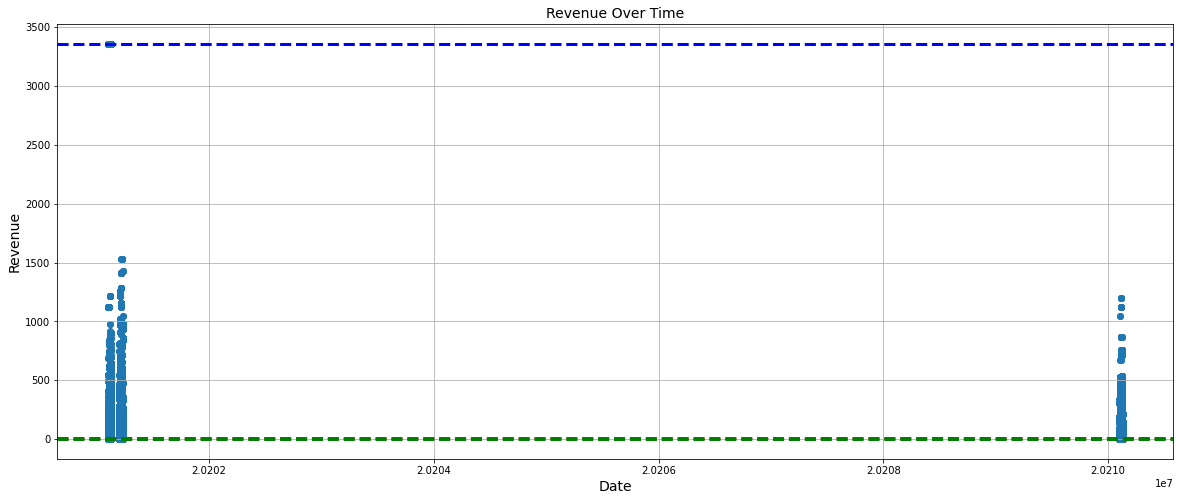

In [60]:
# plotting the trend using line graph
plt.figure(figsize=(20, 8))
plt.scatter(data['event_date'], data['revenue'])

#add horizontal line at mean,max and min value of y
plt.axhline(y=np.nanmean(data['revenue']),color='red', linestyle='--', linewidth=3, label='Avg')
plt.axhline(y=max(data['revenue']),color='blue', linestyle='--', linewidth=3, label='Max')
plt.axhline(y=min(data['revenue']),color='green', linestyle='--', linewidth=3, label='Min')

plt.title('Revenue Over Time', fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Revenue', fontsize=14)
plt.grid(True)
plt.show()

In [61]:
print(np.nanmean(data['revenue']))# average
print(max(data['revenue'])) #max
print(min(data['revenue'])) #min

4.648126773914792
3360.0
0.0


In [62]:
data['event_date'].unique()

array([20201101, 20201102, 20201103, 20201104, 20201105, 20201106,
       20201107, 20201108, 20201109, 20201110, 20201111, 20201112,
       20201113, 20201114, 20201115, 20201116, 20201117, 20201118,
       20201119, 20201120, 20201121, 20201122, 20201123, 20201124,
       20201125, 20201126, 20201127, 20201128, 20201129, 20201130,
       20201201, 20201202, 20201203, 20201204, 20201205, 20201206,
       20201207, 20201208, 20201209, 20201210, 20201211, 20201212,
       20201213, 20201214, 20201215, 20201216, 20201217, 20201218,
       20201219, 20201220, 20201221, 20201222, 20201223, 20201224,
       20201225, 20201226, 20201227, 20201228, 20201229, 20201230,
       20201231, 20210101, 20210102, 20210103, 20210104, 20210105,
       20210106, 20210107, 20210108, 20210109, 20210110, 20210111,
       20210112, 20210113, 20210114, 20210115, 20210116, 20210117,
       20210118, 20210119, 20210120, 20210121, 20210122, 20210123,
       20210124, 20210125, 20210126, 20210127, 20210128, 20210

In [63]:
data.loc[data['revenue'] == max(data['revenue']), 'event_date']

35000      20201102
35001      20201102
35002      20201102
35003      20201102
35004      20201102
             ...   
1409072    20201130
1409073    20201130
1409074    20201130
1409075    20201130
1470911    20201130
Name: event_date, Length: 226, dtype: int64

In [64]:
data.loc[data['revenue'] == min(data['revenue']), 'event_date']

0          20201101
1          20201101
2          20201101
3          20201101
4          20201101
             ...   
4295579    20210131
4295580    20210131
4295581    20210131
4295582    20210131
4295583    20210131
Name: event_date, Length: 4122257, dtype: int64

In [65]:
data['currency'].unique() # revenue is in usd

array(['USD'], dtype=object)

From above we can conclude that over time during the day, the revenue was at it's maximum of 209 dollars on on 15:48, with no revenue generated at 15:47. This line graph does not provide us enough useful information because the timestamps consist of the same day with a slight variation in time from 15:47 to 15:48 which is just a minute long. Hence this cannot be trusted to provide us with sound information.

### Revenue Per Product Category

In [66]:
products = data.groupby('category').agg(np.mean)
products

,event_date,event_bundle_sequence_id,user_pseudo_id,user_first_touch_timestamp,stream_id,revenue,total_item_quantity,purchase_revenue_in_usd,unique_items
category,,,,,,,,,
desktop,2.020370e+07,-8.594355e+05,2.571269e+08,1.607022e+15,2.100450e+09,4.646263,44645.566150,64.728766,7.785276
mobile,2.020367e+07,-1.323124e+06,2.600400e+08,1.606936e+15,2.100450e+09,4.708056,2650.549298,62.321868,7.755741
tablet,2.020374e+07,-3.127780e+07,2.564243e+08,1.606880e+15,2.100450e+09,3.602178,2.535433,59.297297,7.751346


In [67]:
products['revenue']

category
desktop    4.646263
mobile     4.708056
tablet     3.602178
Name: revenue, dtype: float64

In [68]:
data['platform'].unique()

array(['WEB'], dtype=object)

As seen here the average revenue from orders on the website under desktop cateogry is 4.64 dollars, 4.7 dollars for mobile cateogory and 3.6 dollars for tablet cateogry. This shows that mobile and desktop is the most popular category on the website

### Website Performance Across Operating Systems

In [69]:
os = data.groupby('operating_system').agg(np.mean)
os

,event_date,event_bundle_sequence_id,user_pseudo_id,user_first_touch_timestamp,stream_id,revenue,total_item_quantity,purchase_revenue_in_usd,unique_items
operating_system,,,,,,,,,
<Other>,2.020374e+07,-5.355070e+07,2.680774e+08,1.607079e+15,2.100450e+09,5.123410,2.800327,78.571429,7.776895
Android,2.020373e+07,7.931238e+06,2.365539e+08,1.607014e+15,2.100450e+09,3.798712,2.534330,59.547131,7.747302
Macintosh,2.020375e+07,3.095179e+06,2.780821e+08,1.607113e+15,2.100450e+09,3.587488,2.999436,70.311905,7.730658
Web,2.020369e+07,-2.193059e+06,2.651177e+08,1.606947e+15,2.100450e+09,4.730186,44328.807106,63.391304,7.791576
Windows,2.020369e+07,4.639538e+06,2.338349e+08,1.607036e+15,2.100450e+09,4.338249,3.065922,63.641148,7.778001
iOS,2.020361e+07,-4.205921e+06,2.492374e+08,1.606999e+15,2.100450e+09,5.738570,9411.493037,60.043860,7.718179


In [70]:
os['revenue']

operating_system
<Other>      5.123410
Android      3.798712
Macintosh    3.587488
Web          4.730186
Windows      4.338249
iOS          5.738570
Name: revenue, dtype: float64

This shows that users with iOS operating system contribute most to the revenue generated by the website, meaning that most orders are placed by iPhone users. However, Macintosh users contribute the minimum to generating revenue.

### Measuring Performance based on Event

In [71]:
data.columns

Index(['event_date', 'event_timestamp', 'event_name',
       'event_bundle_sequence_id', 'user_pseudo_id',
       'user_first_touch_timestamp', 'stream_id', 'platform', 'items',
       'uses_transient_token', 'revenue', 'currency', 'category',
       'mobile_brand_name', 'mobile_model_name', 'mobile_marketing_name',
       'mobile_os_hardware_model', 'operating_system',
       'operating_system_version', 'language', 'is_limited_ad_tracking',
       'browser', 'browser_version', 'medium', 'name', 'source',
       'total_item_quantity', 'purchase_revenue_in_usd', 'unique_items',
       'transaction_id', 'continent', 'sub_continent', 'country', 'region',
       'city', 'metro'],
      dtype='object')

In [72]:
event_counts = data['event_name'].value_counts()
event_counts

page_view              1350428
user_engagement        1058721
scroll                  493072
view_item               386068
session_start           354970
first_visit             257462
view_promotion          190104
add_to_cart              58543
begin_checkout           38757
select_item              31007
view_search_results      26172
add_shipping_info        19722
add_payment_info         13899
select_promotion          9450
purchase                  5692
click                     1446
view_item_list              71
Name: event_name, dtype: int64

Here we can consider that events named begin_checkout, select_promotion and add_payment_info all lead to increased probability of the client placing the order. Here first_event shall  be used to detect any new customer traffic on the website. While view_promotion and select_promotion events can be used to see how much traffic is on the website due to the promotions. 

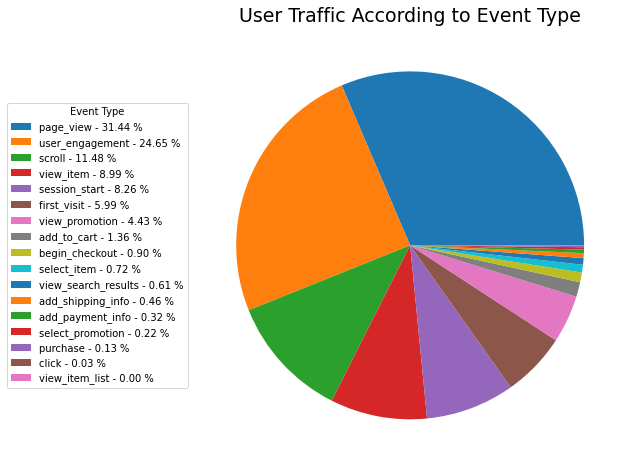

In [73]:
plt.figure(figsize=(30, 8))
y = (event_counts/event_counts.sum()) * 100
mylabels = event_counts.index
labels = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(mylabels, y)]
plt.pie(y)
plt.legend(labels,title = "Event Type",loc='right',bbox_to_anchor=(0, 0.5))
plt.title('User Traffic According to Event Type',fontdict={'fontsize': 19})
plt.show() 

As explained above following observations can be made:<br>
    - Only 1.44% of the users that visit the website have increased chances of making a purchase <br>
    - Of all the users, 5.99% are new customers that the store has acquired<br>
    - Due to the promotions 4.43% of the users visit the website of the store<br>
    - Only 5692 out of 4,295,584 users make a purchase which eventually shows that most visitors on the website do not place an order. There is only 0.13% purchases out of all the events users carry out<br>
    
## Conversion Rate Analysis
This section will judge conversion of events on the website to purchases to assess the performance of the store
### Overall Conversion rate

In [76]:
conversion_rate = event_counts['purchase']/event_counts.sum()
conversion_rate*100

0.13250817583825622

As seen above, only 5692 orders were placed which makes it 0.13% percent of the users placing an order on the website
### Conversion Rates According to Location
#### Location: Continent

In [77]:
continent = data[['event_name', 'continent']].value_counts(dropna=False)
continent

event_name       continent
page_view        Americas     756537
user_engagement  Americas     594198
page_view        Asia         313713
scroll           Americas     275295
page_view        Europe       249030
                               ...  
purchase         (not set)        12
click            Africa           11
                 (not set)         6
view_item_list   Asia              6
                 Oceania           3
Length: 100, dtype: int64

In [78]:
continent[['purchase', 'begin_checkout', 'select_promotion', 'add_payment_info']]

event_name        continent
purchase          Americas      3210
                  Asia          1329
                  Europe        1037
                  Oceania         58
                  Africa          46
                  (not set)       12
begin_checkout    Americas     21751
                  Asia          8690
                  Europe        7250
                  Oceania        529
                  Africa         401
                  (not set)      136
select_promotion  Americas      5219
                  Asia          2254
                  Europe        1777
                  Oceania         96
                  Africa          85
                  (not set)       19
add_payment_info  Americas      7757
                  Asia          3201
                  Europe        2568
                  Oceania        182
                  Africa         139
                  (not set)       52
dtype: int64

In [79]:
def form_bins(locations, events):
    '''This function is a utility function that creates a list for each location with its elements representing
    [begin_checkout user count wrt location,select_promotion user count wrt location,add_payment_info user count wrt
    location]'''
    america = []
    asia=[]
    europe=[]
    africa=[]
    oceania=[]
    for i in locations:
        for j in events:
            if i == 'Americas':
                america.append(continent[j][i])
            elif i == 'Asia':
                asia.append(continent[j][i])
            elif i == 'Europe':
                europe.append(continent[j][i])
            elif i == 'Africa':
                africa.append(continent[j][i])
            else:
                oceania.append(continent[j][i])
    
    # for each location you get counts of the three events selected 
    # ex: america = [120,38,21]
    return america,asia,europe,africa,oceania

In [80]:
locations = ['Americas','Asia','Europe','Africa','Oceania']
events = ['begin_checkout', 'select_promotion', 'add_payment_info']

# Each of these lists is used to create the grouped bar chart below by segmenting user counts according to locations
america,asia,europe,africa,oceania = form_bins(locations,events)
america

[21751, 5219, 7757]

<Figure size 1440x576 with 0 Axes>

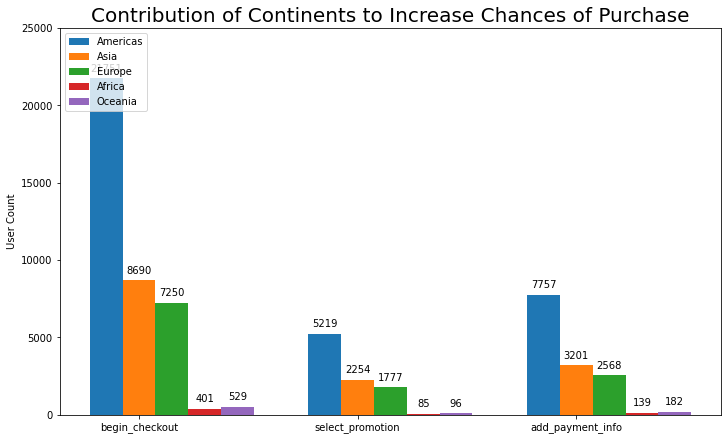

In [86]:
plt.figure(figsize=(20, 8))
locs = {
    'Americas': america,
    'Asia': asia,
    'Europe': europe,
    'Africa': africa,
    'Oceania': oceania
}

x = np.arange(len(events))  # the label locations
width = 0.15  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained',figsize = (10,6))

for attribute, measurement in locs.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, padding=5)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('User Count')
ax.set_title('Contribution of Continents to Increase Chances of Purchase',fontsize=20)
ax.set_xticks(x + width, events)
ax.legend(loc='upper left')
ax.set_ylim(0, 25000)

plt.show()

Here it can be observed that most people in america begin to checkout which is an indicator of increased chances of making a purchase.On second, it would be Asia. It must also be noticed that Oceania and Africa are contributing almost nothing to increase chances of a purchase.

Text(0.5, 1.0, 'Contribution of Continents to Purchases')

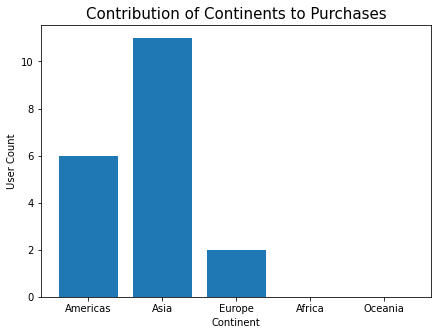

In [87]:
plt.figure(figsize=(7, 5))
counts =[6,11,2,0,0]
plt.bar(locations,counts)
plt.ylabel('User Count')
plt.xlabel('Continent')
plt.title('Contribution of Continents to Purchases',fontsize=15)


As noticeable Asia contributes the most to conversion rate and then on second is America. It can also be seen that no purchases have been made from Africa and Oceania, hence they donot contribute anything to the conversion rate

#### Location: Country

In [88]:
country = data[['event_name', 'country']].value_counts(dropna=False)
country

event_name       country      
page_view        United States    601809
user_engagement  United States    472361
scroll           United States    218203
view_item        United States    174796
session_start    United States    155887
                                   ...  
click            Guatemala             1
purchase         Albania               1
click            Iraq                  1
                 Israel                1
view_item_list   Denmark               1
Length: 1701, dtype: int64

In [89]:
country['purchase']

country
United States           2481
India                    530
Canada                   466
United Kingdom           177
Spain                    131
                        ... 
Bosnia & Herzegovina       1
Bahrain                    1
Bahamas                    1
Armenia                    1
Albania                    1
Length: 101, dtype: int64

Text(0.5, 1.0, 'Contribution of Countries to Purchases')

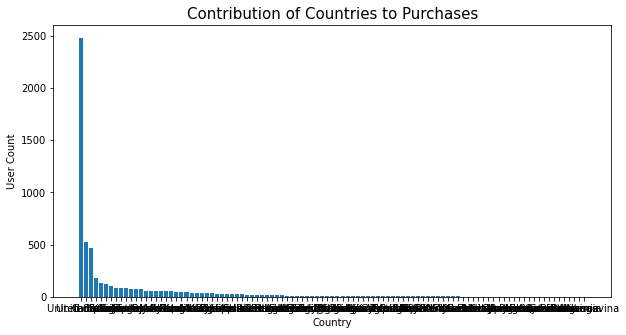

In [90]:
plt.figure(figsize=(25, 7))

plt.bar(country['purchase'].index,country['purchase'])

plt.ylabel('User Count')
plt.xlabel('Country')
plt.title('Contribution of Countries to Purchases',fontsize=15)

As observed here, customers from US purchase most products and then on second is Japan. 
#### Location: Region

In [91]:
region = data[['event_name', 'region']].value_counts(dropna=False)
region

event_name        region        
page_view         California        129422
                  (not set)         126912
user_engagement   California        102602
                  (not set)          99381
page_view         Texas              46161
                                     ...  
view_item_list    Ile-de-France          1
                  Lombardy               1
                  Missouri               1
                  North Carolina         1
add_payment_info  Viken                  1
Length: 5612, dtype: int64

In [92]:
region['purchase']

region
(not set)        557
California       527
Texas            230
Ontario          183
Virginia         166
                ... 
Phnom Penh         1
Penang             1
Odessa Oblast      1
Banten             1
Overijssel         1
Length: 316, dtype: int64

As observed from the data, the region with most purchases is not labelled and on second is California. Moreover, alot of regions like Banten consist of a single purchase which doesn't contribute to our understanding of the data. Hence we donot proceed with this perspective

### Conversion Rates According to Mediums and Sources

In [93]:
data['medium'].unique()

array(['organic', '(none)', '<Other>', 'referral', '(data deleted)',
       'cpc'], dtype=object)

Medium: Every referral to a website also has a medium. Possible medium include: “organic” (unpaid search), “cpc” (cost per click, i.e. paid search), “referral” (referral), “email” (the name of a custom medium you have created), “none” (direct traffic has a medium of “none”).

In [94]:
data['source'].unique()

array(['google', '(direct)', '<Other>', '(data deleted)',
       'shop.googlemerchandisestore.com'], dtype=object)

Direct traffic can come from different sources:<br>
If a visitor knows your URL and enters it directly into his/her browser's address bar <br>
If a visitor has bookmarked your site or saved it as a favourite in his/her browser <br>
If a visitor clicks on a link contained in an email (the URL has been shared by a third person.<br>

In [95]:
medium = data[['event_name', 'medium']].value_counts(dropna=False)
medium

event_name       medium        
page_view        organic           455265
user_engagement  organic           350421
page_view        (none)            311461
                 referral          243054
user_engagement  (none)            242954
                                    ...  
view_item_list   (none)                17
                 organic               16
                 (data deleted)         8
                 <Other>                7
                 cpc                    4
Length: 102, dtype: int64

In [96]:
medium['purchase']

medium
organic           1572
referral          1258
(none)            1251
(data deleted)     839
<Other>            606
cpc                166
dtype: int64

It can be observed that the purchases made on the website were majorly organic but comparitively other mediums also seem to play a part in brining in the orders especially referral. It also needs to be highlighted that cpc medium is contributing the least, indicating that the advertising done for the website is not bringing in orders.

In [97]:
source = data[['event_name', 'source']].value_counts(dropna=False)
source

event_name       source                         
page_view        google                             474525
user_engagement  google                             364649
page_view        <Other>                            355998
                 (direct)                           311461
user_engagement  <Other>                            273829
                                                     ...  
view_item_list   google                                 19
                 (direct)                               17
                 <Other>                                16
                 shop.googlemerchandisestore.com        11
                 (data deleted)                          8
Length: 85, dtype: int64

In [98]:
source['purchase']

source
google                             1620
<Other>                            1290
(direct)                           1251
(data deleted)                      830
shop.googlemerchandisestore.com     701
dtype: int64

Google which is also equivalent to organic traffic that is through a search engine and naturally earned contributed to most of the purchases made at the website. Direct sources also contribute majorly to purchases which is also an indicator of regular and loyal customers of the store. Hence we can conclude that the conversion rate is boosted through purchases made by organic and direct sources. Moreover, the store website contributes the least to the purchases, hence the marketting and UI needs to be improved to get customers to buy at the store.

## User Traffic/Engagement Analysis

In [99]:
data['medium'].value_counts()

organic           1439399
(none)             989684
referral           778087
<Other>            597482
(data deleted)     313917
cpc                177015
Name: medium, dtype: int64

Text(0.5, 1.0, 'User Traffic From Different Mediums')

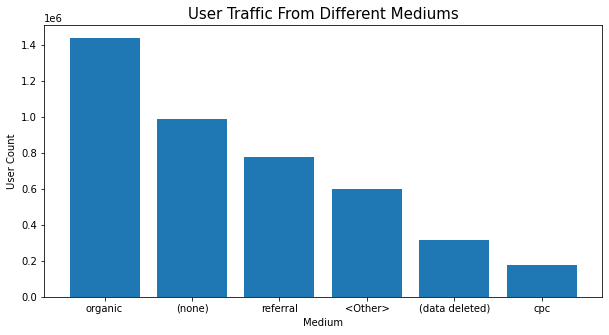

In [100]:
plt.figure(figsize=(10, 5))

plt.bar(data['medium'].value_counts().index,data['medium'].value_counts())

plt.ylabel('User Count')
plt.xlabel('Medium')
plt.title('User Traffic From Different Mediums',fontsize=15)

In [101]:
# percentage of users that come by reference
data['medium'].value_counts()['referral']/data['medium'].value_counts().sum() * 100

18.113648807705772

In [102]:
# percentage of users that come through paid ads
data['medium'].value_counts()['cpc']/data['medium'].value_counts().sum() * 100

4.120859934295313

As obseved, most users that engage on the website are organic users while only 18% users visit the website through referral.It is also significant to note that only 4.12% of the traffic on the website is due to cost per click ads, hence indicating that the advertising strategy of the store is not able to bring customers let alone purchases and the store will be losing money by investing in the ads currently being advertised.

In [103]:
src = data['source'].value_counts()
src

google                             1500418
<Other>                            1131013
(direct)                            989684
shop.googlemerchandisestore.com     365774
(data deleted)                      308695
Name: source, dtype: int64

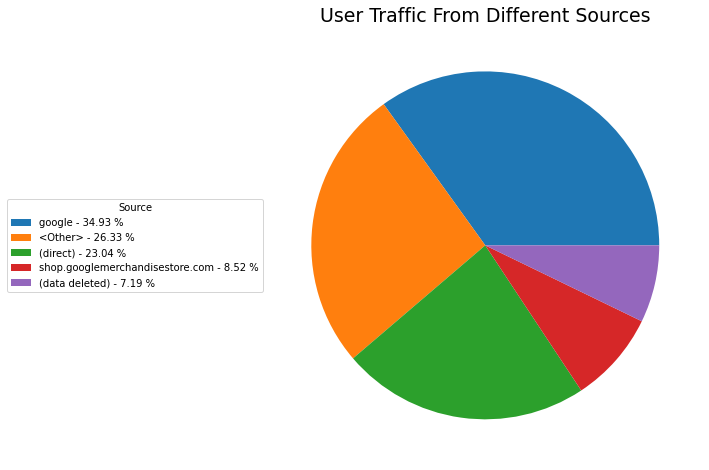

In [104]:
plt.figure(figsize=(30, 8))
y = (src/src.sum())*100
mylabels = src.index
labels = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(mylabels, y)]
plt.pie(y)
plt.legend(labels,title = "Source",loc='right',bbox_to_anchor=(0, 0.5))
plt.title('User Traffic From Different Sources',fontdict={'fontsize': 19})
plt.show() 

As observed most people access the website through direct and organic sources like google which is a search engine

## Mobile Optimization
Mobile optimization refers to the process of designing and adapting a website, application, or digital content to provide an optimal and seamless user experience on mobile devices, such as smartphones and tablets. It involves optimizing the layout, design, functionality, and performance of the digital asset to ensure it is easily accessible, usable, and visually appealing on smaller screens with touch-based interactions.<br><br>
Here we will analyse data to see what needs to be done when it comes to mobile optimization

In [105]:
data['mobile_brand_name'].unique() #all available brand categories

array(['Google', 'Samsung', 'Apple', '<Other>', 'Microsoft', 'Mozilla',
       'Huawei', 'Xiaomi'], dtype=object)

In [106]:
data['mobile_marketing_name'].unique()

array(['<Other>'], dtype=object)

In [107]:
data['mobile_model_name'].unique()

array(['Chrome', '<Other>', 'Safari', 'iPad', 'iPhone', 'Edge',
       'ChromeBook', 'Firefox', 'Pixel 4 XL', 'Pixel 3'], dtype=object)

In [108]:
data['mobile_os_hardware_model'].unique()

array([None], dtype=object)

This reveals that mobile_model_name and mobile_brand_name columns can be used to look for user traffic

In [109]:
mob = data['mobile_brand_name'].value_counts()
mob

Apple        1827605
Google       1507494
<Other>       329271
Samsung       312217
Microsoft     104988
Xiaomi         95651
Huawei         59690
Mozilla        58668
Name: mobile_brand_name, dtype: int64

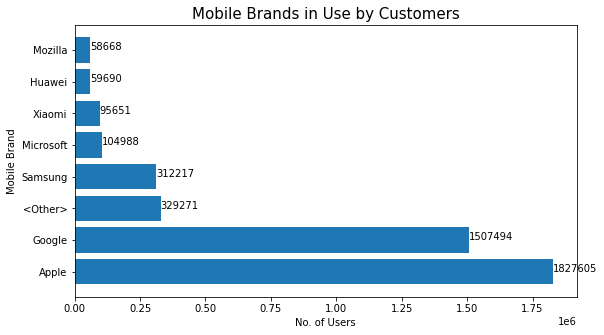

In [110]:
plt.figure(figsize=(9, 5))
# Plot horizontal bar chart
bars = plt.barh(mob.index,mob)

# To get data labels
for  bar in bars:
    width = bar.get_width()
    label_y = bar.get_y() + bar.get_height() / 2
    plt.text(width, label_y, s=f'{width}')

# Define axes labels
plt.xlabel("No. of Users")
plt.ylabel("Mobile Brand")
plt.title('Mobile Brands in Use by Customers',fontdict={'fontsize': 15})

# Display a bar chart   
plt.show()

As observed most customers own mobile phone of Apple and at Second of Google. Hence, it is important to invest in mobile optimization of website for users with phones from these brands 

In [111]:
mod = data['mobile_model_name'].value_counts()
mod

Chrome        1182295
iPhone         891231
<Other>        880093
Safari         869738
ChromeBook     239025
Edge            93016
Firefox         58631
iPad            58544
Pixel 4 XL      12254
Pixel 3         10757
Name: mobile_model_name, dtype: int64

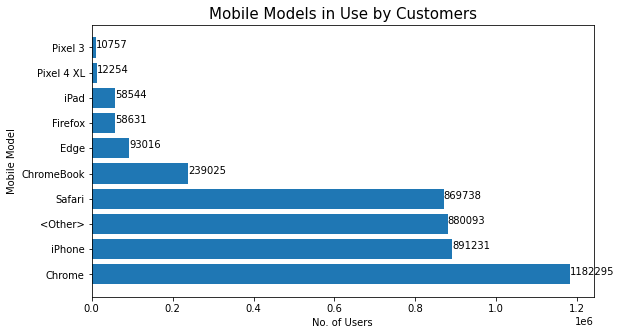

In [112]:
plt.figure(figsize=(9, 5))
# Plot horizontal bar chart
bars = plt.barh(mod.index,mod)

# To get data labels
for  bar in bars:
    width = bar.get_width()
    label_y = bar.get_y() + bar.get_height() / 2
    plt.text(width, label_y, s=f'{width}')

# Define axes labels
plt.xlabel("No. of Users")
plt.ylabel("Mobile Model")
plt.title('Mobile Models in Use by Customers',fontdict={'fontsize': 15})

# Display a bar chart   
plt.show()

As observed most customers use chrome to access the website, hence most investment should be directed towards optimizing website for chrome users. Secondly, Safari and iPhone users also need attention in order to direct more customers to the website because as it was seen earlier most customers own Apple phones.This will be a great way to generate more traffic and eventually increasing chances of purchase.